In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [5]:
df = pd.read_csv("Zomato data .csv")

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
df.shape

(148, 7)

In [8]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [11]:
df['online_order'].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

In [12]:
df['book_table'].value_counts()

book_table
No     140
Yes      8
Name: count, dtype: int64

In [13]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


## convert the data type ofcolumn -- rate

In [19]:
def rate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
df['rate'] = df['rate'].apply(rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

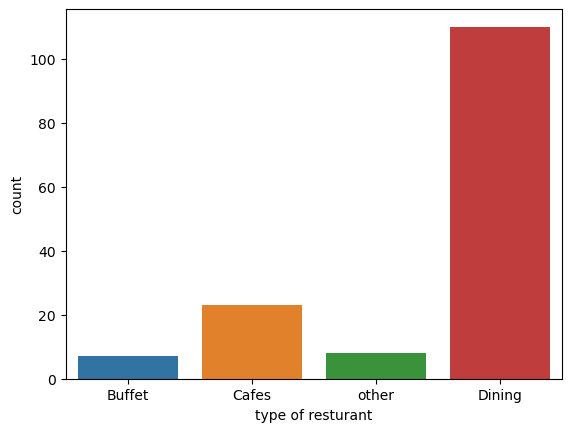

In [25]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

Text(0, 0.5, 'Votes')

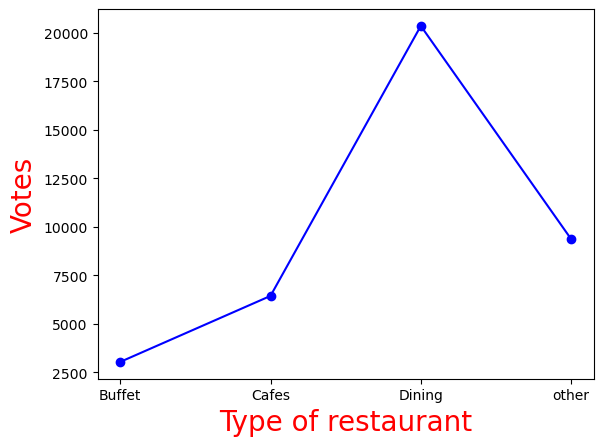

In [31]:
data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red",size=20)

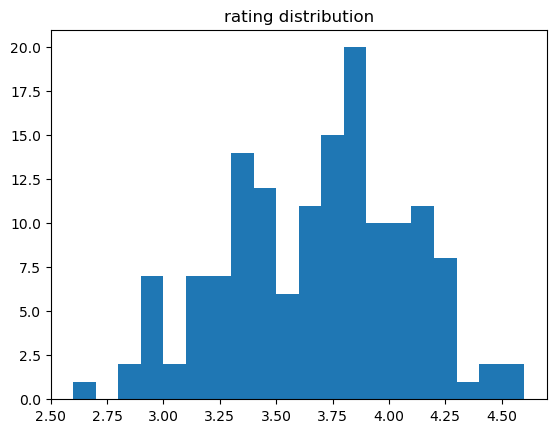

In [38]:
plt.hist(df['rate'], bins=20)
plt.title("rating distribution")
plt.show()

## average order spending bycouples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

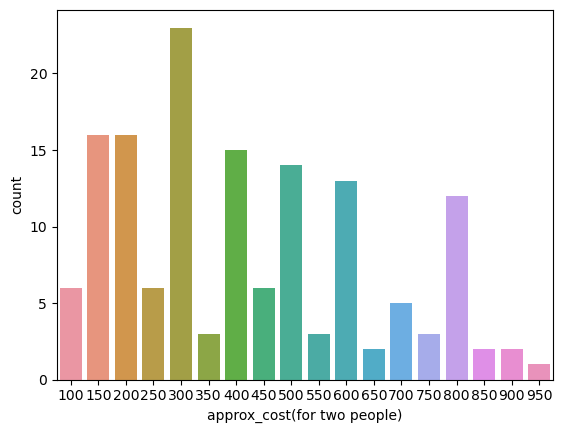

In [40]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

## conclusion - the majority of couples preferr resturants with an approximate of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

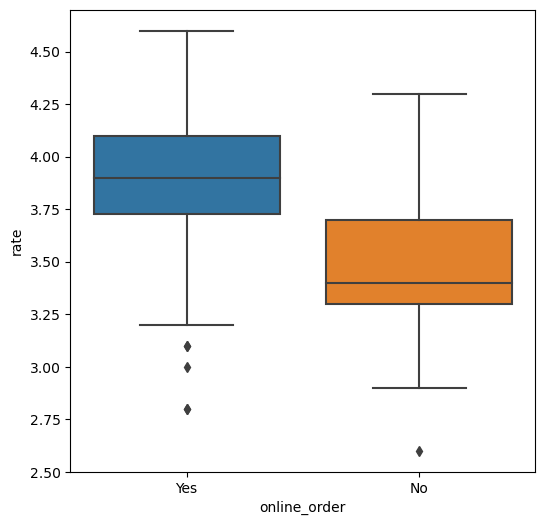

In [41]:
## which model receives maximum rating

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y = 'rate', data = df)

# conclusion - offline order received lower rating in comparison to online order

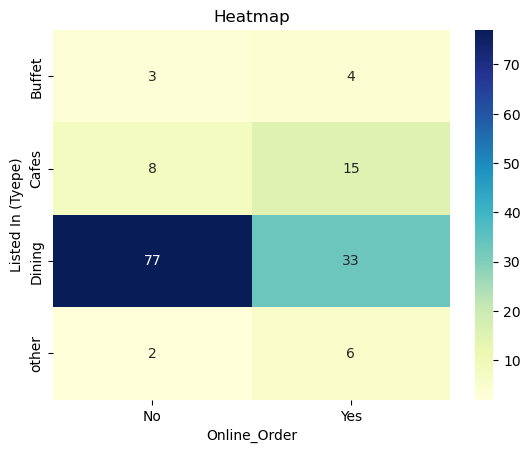

In [42]:
table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size', fill_value = 0)
sns.heatmap(table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online_Order")
plt.ylabel("Listed In (Tyepe)")
plt.show()